# Project : Predicting temperature around nuclear waste cannister

Frank Djidingar Monbe 316435 and Sophie Tiberghien 282240

<hr style="clear:both">

This notebook is part of a machine learning project. The goal is to predict temperature of sensor around a nuclear waste cannister for different times. More information is available in the ReadMe file.

The purpose of this notebook is to visualize the data and prepare it for different machine learning techniques. 


<hr style="clear:both">


## 1 - Importations


### Functions

In [1]:
import numpy as np
import pandas as pd

# Graph:
import matplotlib.pyplot as plt
import plotly.graph_objs as go

### Data

In [2]:
# Import training data

coordinates_train = pd.read_csv("data/TrainingData/Coordinates_Training.csv")
humidity_train = pd.read_csv("data/TrainingData/Training_data_humidity.csv")
pressure_train = pd.read_csv("data/TrainingData/Training_data_pressure.csv")
temperature_train = pd.read_csv("data/TrainingData/Training_data_temperature.csv")

# Import testing data

coordinates_test = pd.read_csv("data/TestDataStudents/Coordinates_Test.csv")
humidity_test = pd.read_csv("data/TestDataStudents/Test_Time_humidity.csv")
pressure_test = pd.read_csv("data/TestDataStudents/Test_Time_pressure.csv")


In [3]:
# Shapes

print("Training Data:")
print(f"coordinates_train has {coordinates_train.shape[0]} rows and {coordinates_train.shape[1]} columns.")
print(f"humidity_train has {humidity_train.shape[0]} rows and {humidity_train.shape[1]} columns.")
print(f"pressure_train has {pressure_train.shape[0]} rows and {pressure_train.shape[1]} columns.")
print(f"temperature_train has {temperature_train.shape[0]} rows and {temperature_train.shape[1]} columns.")
print(" ")
print("Testing Data:")
print(f"coordinates_test has {coordinates_test.shape[0]} rows and {coordinates_test.shape[1]} columns.")
print(f"humidity_test has {humidity_test.shape[0]} rows and {humidity_test.shape[1]} columns.")
print(f"pressure_test has {pressure_test.shape[0]} rows and {pressure_test.shape[1]} columns.")



Training Data:
coordinates_train has 900 rows and 8 columns.
humidity_train has 32 rows and 901 columns.
pressure_train has 32 rows and 901 columns.
temperature_train has 32 rows and 901 columns.
 
Testing Data:
coordinates_test has 145 rows and 8 columns.
humidity_test has 32 rows and 146 columns.
pressure_test has 32 rows and 146 columns.


## 2 - Visualizing data

Visualizing the data can help to have a better understanding of the data.

### 3D plot

Once we have imported the data we can visualize it. 
Since we need to predict the temperature of sensor it is interesting to see where they are.
We have used the plotly website to plot the following graph. (https://plotly.com/python/3d-scatter-plots/)

In [70]:
sensor_graph = go.Figure(
    data=[go.Scatter3d(x=coordinates_train['Coor X [m]'], y=coordinates_train['Coor Y [m]'], z=coordinates_train['Coor Z [m]'], 
                       mode='markers', marker=dict(size=2), name='Training sensor')],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X [m]',
            yaxis_title='Y [m]',
            zaxis_title='Z [m]',
        ),
        margin=dict(l=0, r=0, b=0, t=0),
    )
)

# Adding the test sensors
sensor_graph.add_trace(go.Scatter3d(x=coordinates_test['Coor X [m]'], y=coordinates_test['Coor Y [m]'], z=coordinates_test['Coor Z [m]'], 
                           mode='markers', marker=dict(size=2, color='red'), name='Test sensor'))

sensor_graph.show()

We can see that the testing sensors (in red) are really closed to the cannister. 
It also guive us the intuition to make a KNN model.

### Train set

#### Temperature

The temperature is an integral data since this is what we have to predict. 
We can visualize it, individually, the variation of the temperature for one sensor or we can visualize all the variation of the temperature for all the sensors. 

<Axes: xlabel='M.Time[d]', ylabel='N_32'>

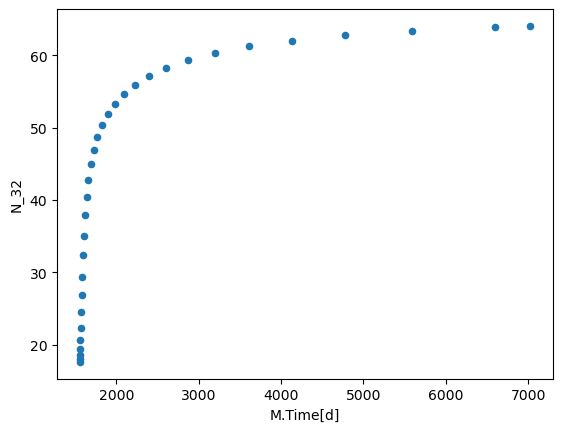

In [5]:
# Visualizing the variation of temperature for the point N_32
temperature_train.plot(kind='scatter', x='M.Time[d]', y='N_32')

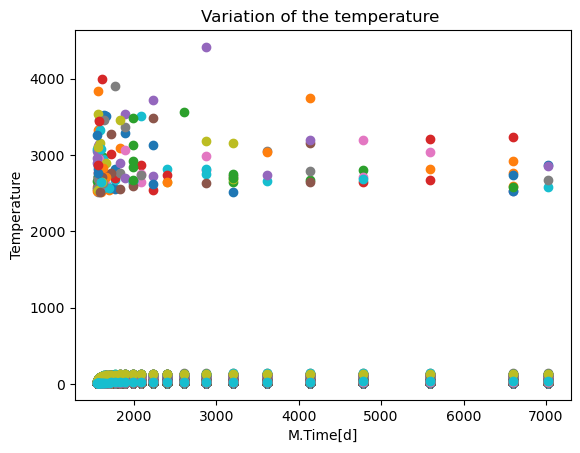

In [6]:
# Visualizing the temperature variation for all the sensors each color is one sensor
x_temp_train = temperature_train["M.Time[d]"]
y_temp_train = temperature_train.iloc[:, 1:]  # we want all the columns but the first because it is the times


for i, column in enumerate(y_temp_train.columns):
    plt.scatter(x_temp_train, y_temp_train[column])
    
plt.xlabel("M.Time[d]")
plt.ylabel("Temperature")
plt.title('Variation of the temperature ')

plt.show()

We can observe that there are "probably" outliers (temp > 2000) that can mislead our training, this is an issue that will be treated afterward.

#### Pressure

<Axes: xlabel='M.Time[d]', ylabel='N_318'>

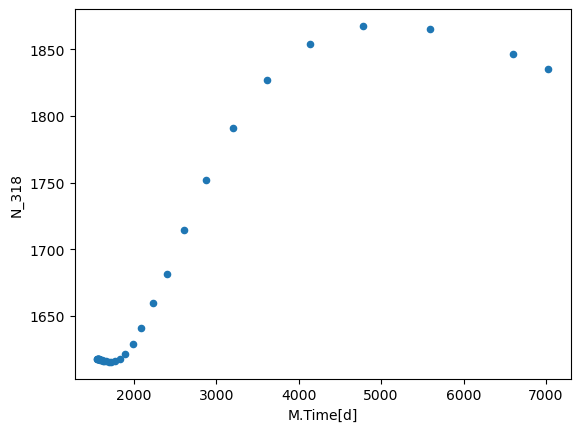

In [7]:
# Visualizing the variation of pressure for the point N_32
pressure_train.plot(kind='scatter', x='M.Time[d]', y='N_318')

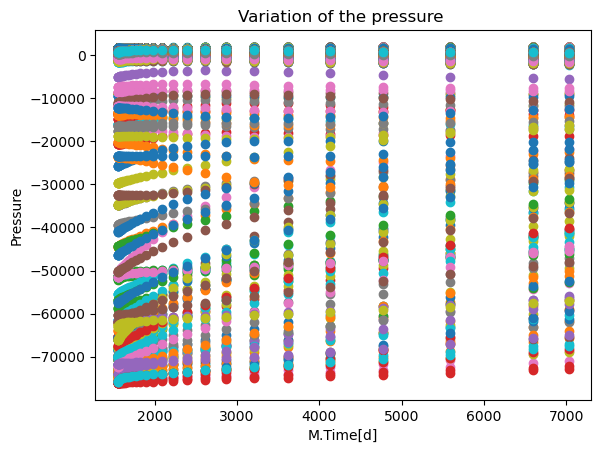

In [8]:
# Visualizing the pressure variation for all the sensors each color is one sensor
x_pres_train = pressure_train["M.Time[d]"]
y_pres_train = pressure_train.iloc[:, 1:]  # we want all the columns but the first because it is the times


for i, column in enumerate(y_pres_train.columns):
    plt.scatter(x_pres_train, y_pres_train[column], label=column)
    
    
plt.xlabel("M.Time[d]")
plt.ylabel("Pressure")
plt.title('Variation of the pressure ')

plt.show()

The values of the pressure has a wild range from near 0 to close to -80000. 

#### Humidity

<Axes: xlabel='M.Time[d]', ylabel='N_32'>

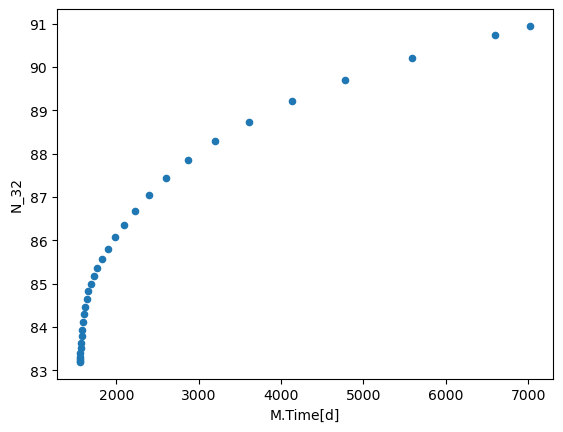

In [9]:
# Visualizing the variation of pressure for the point N_32
humidity_train.plot(kind='scatter', x='M.Time[d]', y='N_32')

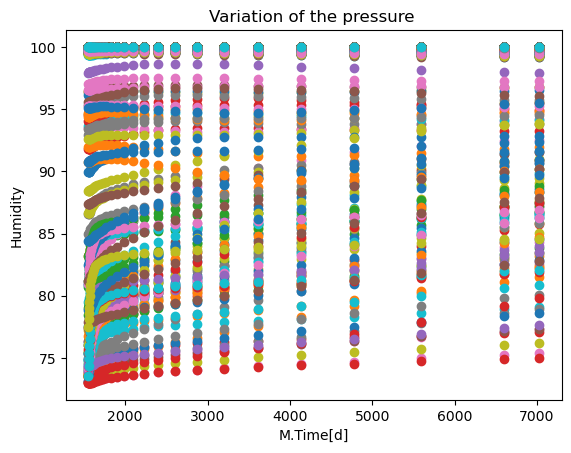

In [10]:
# Visualizing the humidity variation for all the sensors each color is one sensor
x_hum_train = humidity_train["M.Time[d]"]
y_hum_train = humidity_train.iloc[:, 1:]  # we want all the columns but the first because it is the times

for i, column in enumerate(y_hum_train.columns):
    plt.scatter(x_hum_train, y_hum_train[column], label=column)
    
plt.xlabel("M.Time[d]")
plt.ylabel("Humidity")
plt.title('Variation of the pressure ')
plt.show()

### Test set

#### Pressure

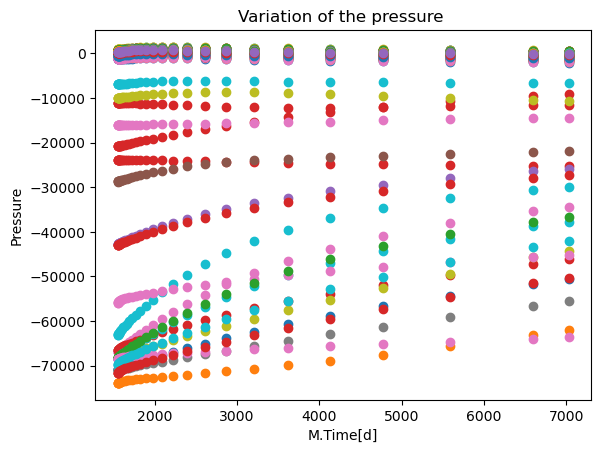

In [11]:
# Visualizing the pressure variation for all the sensors each color is one sensor
x_pres_test = pressure_test["M.Time[d]"]
y_pres_test = pressure_test.iloc[:, 1:]  # we want all the columns but the first because it is the times

for i, column in enumerate(y_pres_test.columns):
    plt.scatter(x_pres_test, y_pres_test[column])
    
plt.xlabel("M.Time[d]")
plt.ylabel("Pressure")
plt.title('Variation of the pressure ')

plt.show()

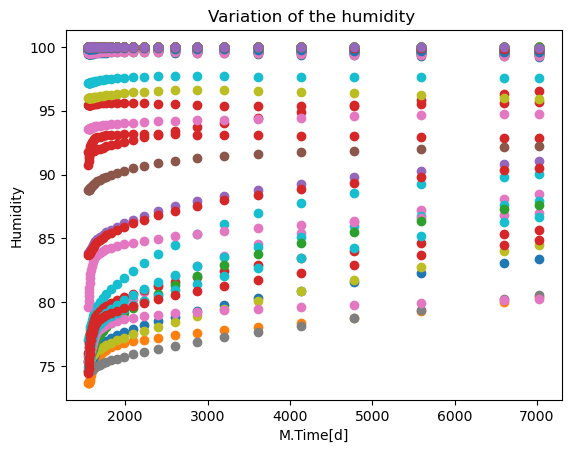

In [12]:
# Visualizing the humidity variation for all the sensors each color is one sensor
x_hum_test = humidity_test["M.Time[d]"]
y_hum_test = humidity_test.iloc[:, 1:]  # we want all the columns but the first because it is the times

for i, column in enumerate(y_hum_test.columns):
    plt.scatter(x_hum_test, y_hum_test[column])
    
plt.xlabel("M.Time[d]")
plt.ylabel("Humidity")
plt.title('Variation of the humidity ')

plt.show()

### Train vs Test

Now, the presure variation of the sensor of training and the sensor of the testing, can be compared. We use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html to be able to plot graph side by side.

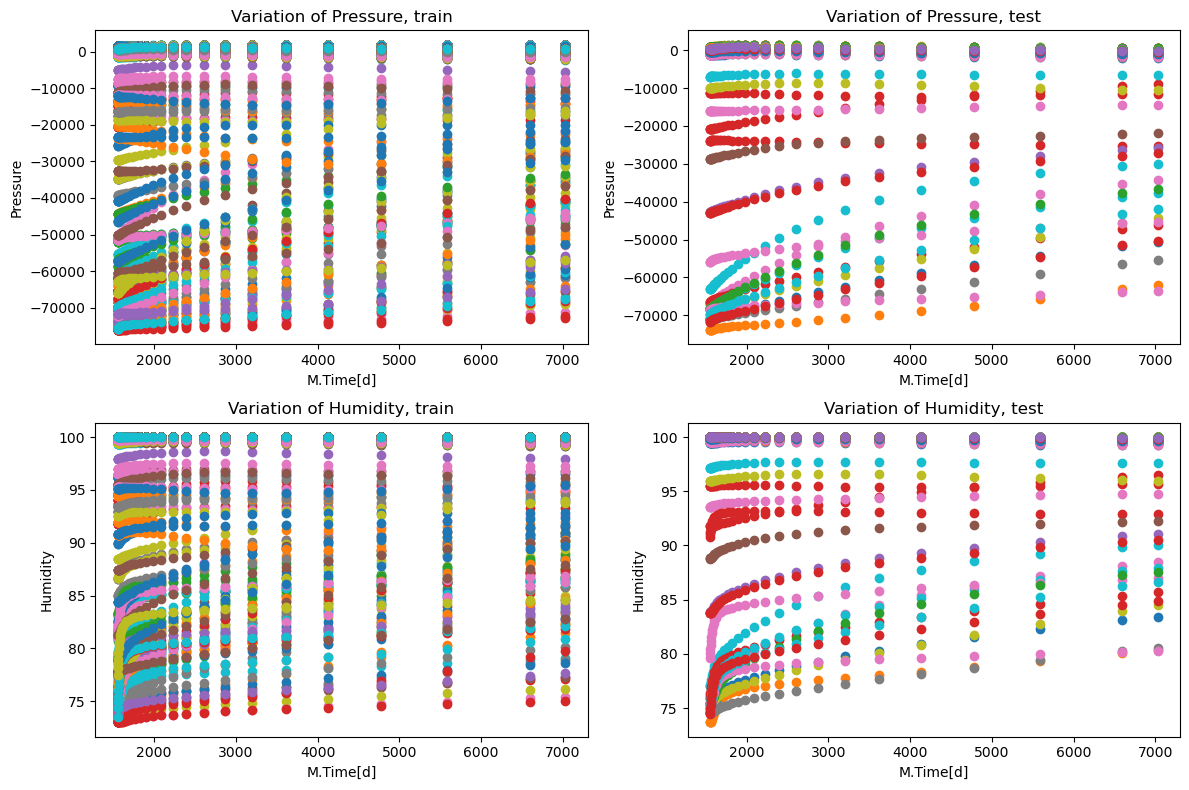

In [13]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the pressure graph on the first row, first column
for i, column in enumerate(y_pres_train.columns):
    axs[0, 0].scatter(x_pres_train, y_pres_train[column])

axs[0, 0].set_xlabel("M.Time[d]")
axs[0, 0].set_ylabel("Pressure")
axs[0, 0].set_title("Variation of Pressure, train")

# Plot the humidity graph on the first row, second column
for i, column in enumerate(y_pres_test.columns):
    axs[0, 1].scatter(x_pres_test, y_pres_test[column])

axs[0, 1].set_xlabel("M.Time[d]")
axs[0, 1].set_ylabel("Pressure")
axs[0, 1].set_title("Variation of Pressure, test")

# Plot the temperature graph on the second row, first column
for i, column in enumerate(y_hum_train.columns):
    axs[1, 0].scatter(x_hum_train, y_hum_train[column])

axs[1, 0].set_xlabel("M.Time[d]")
axs[1, 0].set_ylabel("Humidity")
axs[1, 0].set_title("Variation of Humidity, train")

# Plot the wind speed graph on the second row, second column
for i, column in enumerate(y_hum_test.columns):
    axs[1, 1].scatter(x_hum_test, y_hum_test[column])

axs[1, 1].set_xlabel("M.Time[d]")
axs[1, 1].set_ylabel("Humidity")
axs[1, 1].set_title("Variation of Humidity, test")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The humidity of the training sensor and testing sensor are in the same range, so does the humidity. There is not outliers, only the temperature will be modify.


## 3 - Cleaning the data

### Tackling the outliers

After visualizing the data, we need to tackle the outliers that we have identify in temperature_train. We want to delete all the values >2000

In [14]:
def remove_outliers (temperature_train):
    temperature_train_no_outliers = temperature_train.copy()
    temperature_train_no_outliers.iloc[:, 1:] = temperature_train_no_outliers.iloc[:, 1:].where(temperature_train_no_outliers.iloc[:, 1:] <= 2000, other=np.nan)
    return temperature_train_no_outliers

temperature_train_no_outliers =remove_outliers(temperature_train)

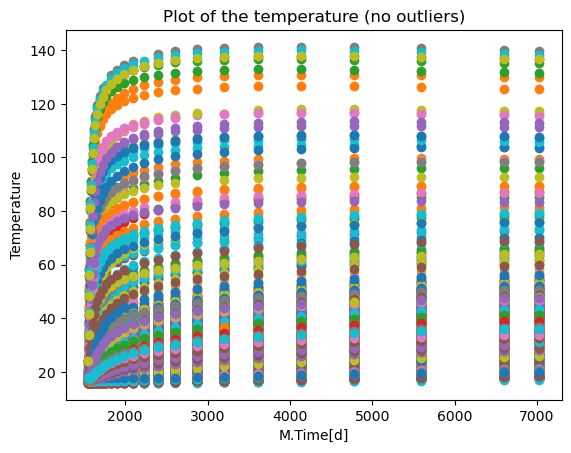

In [15]:
# Plotting the data with the removed outliers

x_data = temperature_train_no_outliers["M.Time[d]"]
y_data = temperature_train_no_outliers.iloc[:, 1:] # we want all the columns but the first

for i in range(y_data.shape[1]):
    plt.scatter(x_data, y_data.iloc[:, i])
    
plt.xlabel("M.Time[d]")
plt.ylabel("Temperature")
plt.title("Plot of the temperature (no outliers)")
plt.show()

### Looking for missing values

In [16]:
def finding_missing_values(coordinates_train):
    if coordinates_train.isna().any().any():
        print("There are missing values in the DataFrame.")
    else:
        print("There are no missing values in the DataFrame.")

finding_missing_values(coordinates_train)
finding_missing_values(pressure_train)
finding_missing_values(humidity_train)
finding_missing_values(temperature_train)

finding_missing_values(coordinates_test)
finding_missing_values(pressure_test)
finding_missing_values(humidity_test)


There are no missing values in the DataFrame.
There are missing values in the DataFrame.
There are missing values in the DataFrame.
There are missing values in the DataFrame.
There are no missing values in the DataFrame.
There are no missing values in the DataFrame.
There are no missing values in the DataFrame.


After analizing the data we can see that there are missing data for sensor N_442 , N_518 and N_693, we have decided that the data from these threee sonsor will be deleted because it is only 3 sensors out of 900.

### Interpolate the missing values 

To fill the missing data we have tried several methods:  
      1- Using the mean of temperature for each sensors  
      2- Using spline interpolation    
      3- Using interpolation by taking the values of the previous time and the next times for each missing values
        
The mean was sometimes overestimating or underestimating the values, the spline interpolation was hard to compute and not precise for all the sensors.   
  
The final method is (3), interpolation, and is the only one presented is this notebook.

In [74]:
# Interpolate the missing temperature
def interpolate_missing_values(temperature_train_no_outliers):
    temperature_train_clean = temperature_train_no_outliers.copy()
    temperature_train_clean.interpolate(method='linear', axis=0, inplace=True)
    return temperature_train_clean

temperature_train_clean = interpolate_missing_values(temperature_train_no_outliers)
temperature_train_clean.to_csv('temperature_train_clean.csv', index = False )

This interpolation method is not working if the missing value is the first time, we have to use another method and 'bfill' to use the next valid value. (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)


In [18]:
# To handle the missing values for the first and last times we need to use bfill:
temperature_train_clean = temperature_train_clean.fillna(method='bfill')

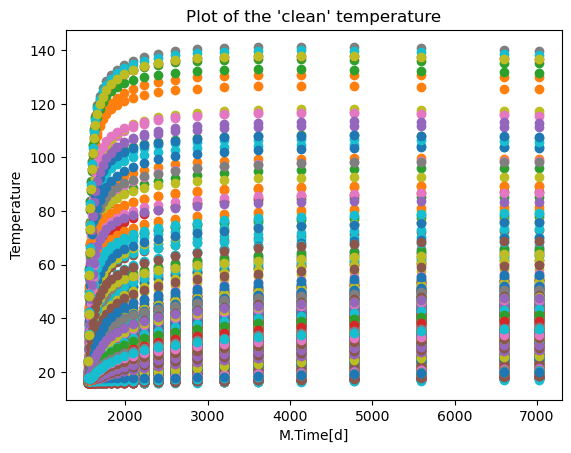

In [19]:
# Plotting the "cleaned" data

x_data = temperature_train_clean["M.Time[d]"]
y_data = temperature_train_clean.iloc[:, 1:]  # we want all the columns but the first

for i in range(y_data.shape[1]):
    plt.scatter(x_data, y_data.iloc[:, i])
    
plt.xlabel("M.Time[d]")
plt.ylabel("Temperature")
plt.title("Plot of the 'clean' temperature")
plt.show()

Now that we have clean temperature we can plot more graph to find some between the different features.

## 4 - Ploting the data

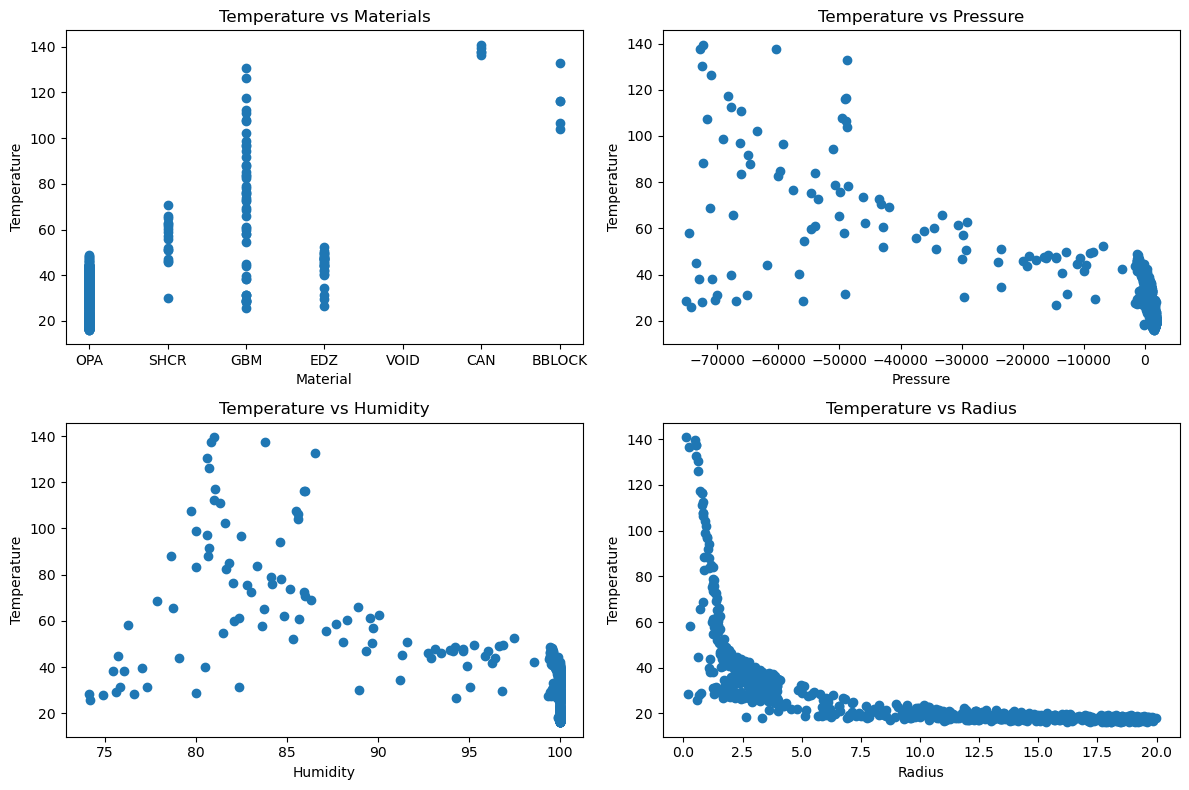

In [20]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotting the temperature vs material
x_mat = coordinates_train.iloc[:, 3]
y_mat = temperature_train_clean.iloc[25, 1:]

axs[0, 0].scatter(x_mat, y_mat)
axs[0, 0].set_xlabel("Material")
axs[0, 0].set_ylabel("Temperature")
axs[0, 0].set_title('Temperature vs Materials')

# Plotting the temperature vs pressure 
x_pressure = pressure_train.iloc[25, 1:]
y_pressure = temperature_train_clean.iloc[25, 1:]

axs[0, 1].scatter(x_pressure, y_pressure)
axs[0, 1].set_xlabel("Pressure")
axs[0, 1].set_ylabel("Temperature")
axs[0, 1].set_title('Temperature vs Pressure')

# Plotting the temperature vs humidity
x_hum = humidity_train.iloc[25, 1:]
y_hum = temperature_train_clean.iloc[25, 1:]

axs[1, 0].scatter(x_hum, y_hum)
axs[1, 0].set_xlabel("Humidity")
axs[1, 0].set_ylabel("Temperature")
axs[1, 0].set_title('Temperature vs Humidity')

# Plotting the temperature vs radius
x_r = coordinates_train.iloc[:, 7]
y_r = temperature_train_clean.iloc[25, 1:]

axs[1, 1].scatter(x_r, y_r)
axs[1, 1].set_xlabel("Radius")
axs[1, 1].set_ylabel("Temperature")
axs[1, 1].set_title('Temperature vs Radius')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

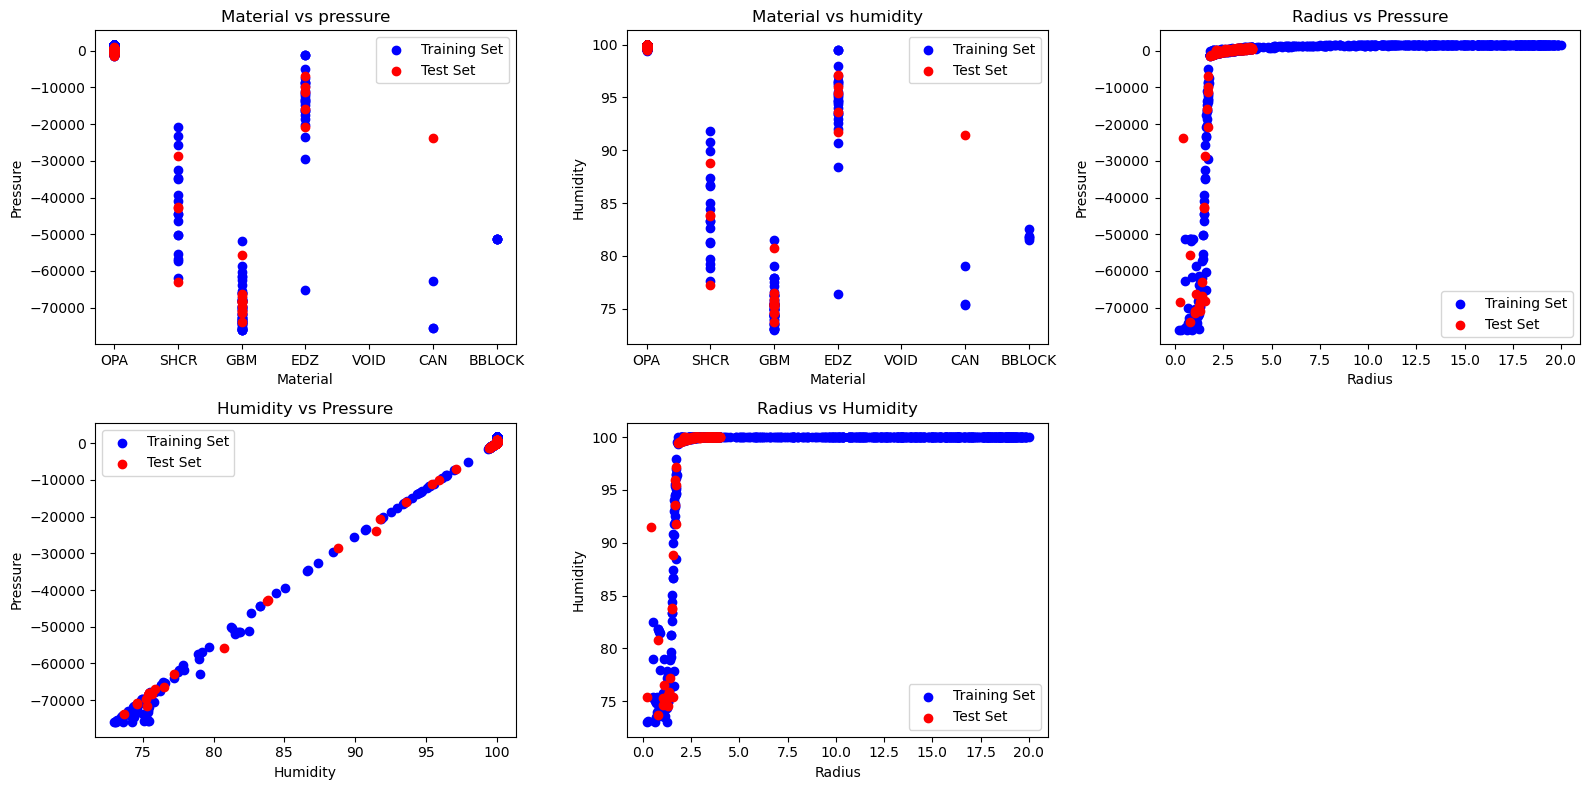

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

# First subplot
x_pres_1 = coordinates_train.iloc[:, 3]
x_pres_2 = coordinates_test.iloc[:, 3]
y_pres_1 = pressure_train.iloc[3, 1:]
y_pres_2 = pressure_test.iloc[3, 1:]

axs[0, 0].scatter(x_pres_1, y_pres_1, color='blue', label='Training Set')
axs[0, 0].scatter(x_pres_2, y_pres_2, color='red', label='Test Set')
axs[0, 0].set_xlabel("Material")
axs[0, 0].set_ylabel("Pressure")
axs[0, 0].set_title('Material vs pressure')
axs[0, 0].legend()

# Second subplot
x_hum_1 = coordinates_train.iloc[:, 3]
x_hum_2 = coordinates_test.iloc[:, 3]
y_hum_1 = humidity_train.iloc[3, 1:]
y_hum_2 = humidity_test.iloc[3, 1:]

axs[0, 1].scatter(x_hum_1, y_hum_1, color='blue', label='Training Set')
axs[0, 1].scatter(x_hum_2, y_hum_2, color='red', label='Test Set')
axs[0, 1].set_xlabel("Material")
axs[0, 1].set_ylabel("Humidity")
axs[0, 1].set_title('Material vs humidity')
axs[0, 1].legend()

# Third subplot
x_pres_3 = coordinates_train.iloc[:, 7]
x_pres_4 = coordinates_test.iloc[:, 7]
y_pres_3 = pressure_train.iloc[3, 1:]
y_pres_4 = pressure_test.iloc[3, 1:]

axs[0, 2].scatter(x_pres_3, y_pres_3, color='blue', label='Training Set')
axs[0, 2].scatter(x_pres_4, y_pres_4, color='red', label='Test Set')
axs[0, 2].set_xlabel("Radius")
axs[0, 2].set_ylabel("Pressure")
axs[0, 2].set_title('Radius vs Pressure')
axs[0, 2].legend()

# Fourth subplot
x_hum_1 = humidity_train.iloc[3, 1:]
x_hum_2 = humidity_test.iloc[3, 1:]
y_hum_1 = pressure_train.iloc[3, 1:]
y_hum_2 = pressure_test.iloc[3, 1:]

axs[1, 0].scatter(x_hum_1, y_hum_1, color='blue', label='Training Set')
axs[1, 0].scatter(x_hum_2, y_hum_2, color='red', label='Test Set')
axs[1, 0].set_xlabel("Humidity")
axs[1, 0].set_ylabel("Pressure")
axs[1, 0].set_title('Humidity vs Pressure')
axs[1, 0].legend()

# Fifth subplot
x_hum_1 = coordinates_train.iloc[:, 7]
x_hum_2 = coordinates_test.iloc[:, 7]
y_hum_1 = humidity_train.iloc[3, 1:]
y_hum_2 = humidity_test.iloc[3, 1:]

axs[1, 1].scatter(x_hum_1, y_hum_1, color='blue', label='Training Set')
axs[1, 1].scatter(x_hum_2, y_hum_2, color='red', label='Test Set')
axs[1, 1].set_xlabel("Radius")
axs[1, 1].set_ylabel("Humidity")
axs[1, 1].set_title('Radius vs Humidity')
axs[1, 1].legend()

# Remove empty subplot
fig.delaxes(axs[1, 2])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

For now, the material are strings we want to change them to numerical values so we can use them as features. We are using one hot encoding. 

In [22]:
one_hot_encoded = pd.get_dummies(coordinates_train['Material'], prefix='Material')
coordinates_train_clean = pd.concat([coordinates_train, one_hot_encoded], axis=1)
coordinates_train_clean.drop('Material', axis=1, inplace=True)

In [23]:
one_hot_encoded = pd.get_dummies(coordinates_test['Material'], prefix='Material')
coordinates_test_clean = pd.concat([coordinates_test, one_hot_encoded], axis=1)
coordinates_test_clean.drop('Material', axis=1, inplace=True)

## 5 - Merging the data for KNN

In order to merge the data set, we need to transpose temperature, humidity and pressure for the train and test sets.

In [24]:
temperature_train_transp = temperature_train_clean.transpose()
humidity_train_transp = humidity_train.transpose()
pressure_train_transp = pressure_train.transpose()

In [25]:
humidity_test_transp = humidity_test.transpose()
pressure_test_transp = pressure_test.transpose()

In order to merge the data we need to rename the first column to 'Sensor ID'

### Train

In [26]:
# Temperature train 
# Set row 1 as the column labels
temperature_train_transp.columns = temperature_train_transp.iloc[0]

# Drop row 1
temperature_train_transp = temperature_train_transp.drop(temperature_train_transp.index[0])
# Rename the index
temperature_train_transp.index.name = 'Sensor ID'

In [27]:
# Humidity train 
# Set row 1 as the column labels
humidity_train_transp.columns = humidity_train_transp.iloc[0]

# Drop row 1
humidity_train_transp = humidity_train_transp.drop(humidity_train_transp.index[0])
# Rename the index
humidity_train_transp.index.name = 'Sensor ID'

In [28]:
# Pressure train 
# Set row 1 as the column labels
pressure_train_transp.columns = pressure_train_transp.iloc[0]

# Drop row 1
pressure_train_transp = pressure_train_transp.drop(pressure_train_transp.index[0])
# Rename the index
pressure_train_transp.index.name = 'Sensor ID'

In [29]:
# Merge the data frames based on the 'Sensor Id' column
merged_df = pd.merge(humidity_train_transp, pressure_train_transp , on='Sensor ID')
merged_df = pd.merge(merged_df, temperature_train_transp, on='Sensor ID')
merged_df = pd.merge(merged_df, coordinates_train_clean, on='Sensor ID')

# We are deleting some unnecessary columns
merged_data_train = merged_df.drop(columns=['Unnamed: 0'])
merged_data_train = merged_data_train.drop(columns=['Index'])
merged_data_train = merged_data_train.drop(columns=['Material_VOID'])

# We delete N_442, N_518 and N_693 because humidity, temperature and pressure are missing
merged_data_train = merged_data_train.drop(index=merged_data_train.index[441], axis=0)
merged_data_train = merged_data_train.drop(index=merged_data_train.index[516], axis=0)
merged_data_train = merged_data_train.drop(index=merged_data_train.index[690], axis=0)

merged_data_train.to_csv('merged_data_train.csv', index=False)

### Test

In [30]:
# Humidity test 
# Set row 1 as the column labels
humidity_test_transp.columns = humidity_test_transp.iloc[0]

# Drop row 1
humidity_test_transp = humidity_test_transp.drop(humidity_test_transp.index[0])
# Rename the index
humidity_test_transp.index.name = 'Sensor ID'

In [31]:
# Pressure test 
# Set row 1 as the column labels
pressure_test_transp.columns = pressure_test_transp.iloc[0]

# Drop row 1
pressure_test_transp = pressure_test_transp.drop(pressure_test_transp.index[0])
# Rename the index
pressure_test_transp.index.name = 'Sensor ID'

In [32]:
# Merge the data frames based on the 'Sensor Id' column
merged_df = pd.merge(humidity_test_transp, pressure_test_transp, on='Sensor ID')
merged_df = pd.merge(merged_df,coordinates_test_clean , on='Sensor ID')

# We are deleting some unnecessary columns
merged_data_test = merged_df.drop(columns=['Unnamed: 0'])
merged_data_test = merged_data_test.drop(columns=['Index'])

There is more material in the train set than in the test set (Material_BBLOCK), so we need to add a column of 0 in the test set.

In [33]:
merged_data_test['Material_BBLOCK'] = 0
merged_data_test.to_csv('merged_data_test.csv', index=False)

We have now two files of prepared and merged data ready to use in different machine learning techniques.

We try another technique:  
   We observe the following graph, and as the sensors to be predicted are concentrated at tube level, we tried select only the sensors in the train close to the tube using the R variable.

In [71]:
sensor_graph = go.Figure(
    data=[go.Scatter3d(x=coordinates_train['Coor X [m]'], y=coordinates_train['Coor Y [m]'], z=coordinates_train['Coor Z [m]'], 
                       mode='markers', marker=dict(size=2), name='Training sensor')],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X [m]',
            yaxis_title='Y [m]',
            zaxis_title='Z [m]',
        ),
        margin=dict(l=0, r=0, b=0, t=0),
    )
)

# Adding the test sensors
sensor_graph.add_trace(go.Scatter3d(x=coordinates_test['Coor X [m]'], y=coordinates_test['Coor Y [m]'], z=coordinates_test['Coor Z [m]'], 
                           mode='markers', marker=dict(size=2, color='red'), name='Test sensor'))

sensor_graph.show()

In [72]:
def tube(coordinates_train_clean):
    coordinates_train_tube = coordinates_train_clean.copy()
    coordinates_train_tube = coordinates_train_tube.loc[coordinates_train_tube.iloc[:, -8] <= 7]
    return coordinates_train_tube



coordinates_train_tube_tout =tube(coordinates_train_clean)

The file 'coordinates_train_tube.csv' was used instead of 'temperature_train_clean_juste.csv' in the merging process. 
For KNN : The result were not better than using the whole set of training sensors. This is probably due to the fact that KNN takes the nearest neighbors so it will automatically select the sensor clodes to the canister.

In [73]:
sensor_graph = go.Figure(
    data=[go.Scatter3d(x=coordinates_train_tube_tout['Coor X [m]'], y=coordinates_train_tube_tout['Coor Y [m]'], z=coordinates_train_tube_tout['Coor Z [m]'], 
                       mode='markers', marker=dict(size=2), name='Training sensor')],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X [m]',
            yaxis_title='Y [m]',
            zaxis_title='Z [m]',
        ),
        margin=dict(l=0, r=0, b=0, t=0),
    )
)

# Adding the test sensors
sensor_graph.add_trace(go.Scatter3d(x=coordinates_test['Coor X [m]'], y=coordinates_test['Coor Y [m]'], z=coordinates_test['Coor Z [m]'], 
                           mode='markers', marker=dict(size=2, color='red'), name='Test sensor'))

sensor_graph.show()

## 6 - Merging the data for NN

### Data recuperation 

In [54]:
# recuperate the complete data set
X_train = pd.read_csv('merged_data_train.csv') 
X_test = pd.read_csv('merged_data_test.csv')

# convert into numpy arrays
X_train= X_train.to_numpy()
X_test = X_test.to_numpy()

print('\nTrain set shape:')
print(f'X: {X_train.shape} ')

print('\nTest set shape:')
print(f'X: {X_test.shape} ')



Train set shape:
X: (897, 107) 

Test set shape:
X: (145, 75) 


### Times preprocess

In [67]:
times = [1554.0, 1556.0, 1558.0, 1560.0, 1563.0, 1567.0, 1572.0, 1578.0, 1585.0, 1595.0, 1606.0, 1621.0, 1639.0, 1662.0, 1690.0, 1726.0, 1770.0, 1826.0, 1895.0, 1982.0, 2090.0, 2226.0, 2395.0, 2607.0, 2871.0, 3202.0, 3616.0, 4133.0, 4779.0, 5587.0, 6597.0, 7028.0]

# Convert the time values to elapsed seconds
reference_point = times[0]
transformed_times = [(t - reference_point) * 2 for t in times]

# Repeat the transformed_times vector 897 times in a single column for X_train
transformed_times_train = np.tile(np.array(transformed_times).reshape(-1, 1), (897, 1))

# Repeat the transformed_times vector 145 times in a single column for X_test
transformed_times_test = np.tile(np.array(transformed_times).reshape(-1, 1), (145, 1))

time_train = transformed_times_train
time_test = transformed_times_test

### Data reshape X_train

In [68]:
# reshape coloumns of X_train

X_hum_col = X_train[:,1:33]
X_hum_col = X_hum_col.reshape(-1,1)


X_pres_col = X_train[:,33:65]
X_pres_col = X_pres_col.reshape(-1,1)


X_temp_col = X_train[:,65:97]
X_temp_col = X_temp_col.reshape(-1,1)


X_cor_col = X_train[:,[-7,-8,-9,-10]]
X_cor_col = X_cor_col[:, ::-1]
X_cor_col = np.repeat(X_cor_col, 32, axis=0)

# concatenate

X_concatenate = np.concatenate((time_train, X_hum_col, X_pres_col, X_temp_col, X_cor_col), axis=1)
df = pd.DataFrame(X_concatenate)
df.to_csv('X_train.csv', index=False)

# Finally X_train is 

X_train = X_concatenate 

# Transform X_train in float 

X_train= X_train.astype(np.float32)

print('\nTrain set type:')
print(X_train.dtype)
print('\nTrain set shape:')
print(f'X: {X_train.shape} ')


Train set type:
float32

Train set shape:
X: (28704, 8) 


### Data reshape X_test

In [69]:
# reshape X_test 

X_hum_test = X_test[:,1:33]
X_hum_test = X_hum_test.reshape(-1,1)


X_pres_test = X_test[:,33:65]
X_pres_test = X_pres_test.reshape(-1,1)


X_cor_test = X_test[:,[-7,-8,-9,-10]]
X_cor_test = X_cor_test[:, ::-1]
X_cor_test = np.repeat(X_cor_test, 32, axis=0)

# Concatenate 

X_conca_test = np.concatenate((time_test, X_hum_test, X_pres_test, X_cor_test), axis=1)
df = pd.DataFrame(X_conca_test)
df.to_csv('X_test.csv', index=False)

# Finally X_test is 

X_test = X_conca_test

# Transform X_test in float

X_test= X_test.astype(np.float32)

print('\nTest set type:')
print(X_test.dtype)
print('\nTest set shape:')
print(f'X: {X_test.shape} ')


Test set type:
float32

Test set shape:
X: (4640, 7) 
